In [153]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [154]:
# Load the diabetes dataset
A, b = datasets.load_diabetes(return_X_y=True)
indices = np.random.permutation(A.shape[0])
# Apply the permutation to shuffle both A and b
A = A[indices]
b = b[indices]
# split the data to train and test
split_index = int(0.8*len(b))
b_train, b_test = b[:split_index], b[split_index:]
A_train, A_test = A[:split_index,] , A[split_index:]

In [155]:
A_pinv = np.linalg.pinv(A)
x_star = A_pinv @ b
err = .5 * np.linalg.norm(A @ x_star - b) ** 2
print(' error = {:.3e}'.format( err))

 error = 5.747e+06


In [156]:
# our parameters for gradient descent
n = 10  # length of initial vector
k = 10000 # number of iterations
eps = 1e-2 # step size
l = 4 # error allowed

In [157]:
err_fun = lambda x,A,b: .5 * np.linalg.norm(A @ x - b) ** 2  # returns value of f(x)

In [158]:
# gradient descent train
xk = np.random.rand(n)
errors_test = []
errors_train = []
for jj in range(k):
    grad = (A_train.T @ A_train) @ xk - A_train.T @ b_train
    xk = xk - eps * grad

    err_train = err_fun(xk, A_train, b_train)
    err_test = err_fun(xk, A_test, b_test)
    
    if (jj %(k/10) == 0):
        print('GD, iter {}, error = {:.3e}'.format(jj, err_train))
    errors_train.append(err_train)
    errors_test.append(4*err_test) # account for number of data points (MSE)
    if np.linalg.norm(grad) < l:
        print(f'GD converged after {jj} iterations')
        break

GD, iter 0, error = 5.037e+06
GD, iter 1000, error = 4.616e+06
GD, iter 2000, error = 4.612e+06
GD, iter 3000, error = 4.609e+06
GD, iter 4000, error = 4.606e+06
GD, iter 5000, error = 4.604e+06
GD, iter 6000, error = 4.601e+06
GD, iter 7000, error = 4.599e+06
GD, iter 8000, error = 4.598e+06
GD, iter 9000, error = 4.596e+06


In [159]:
A_test_pinv = np.linalg.pinv(A_test)
x_star = A_test_pinv @ b_test
err = .5 * np.linalg.norm(A_test @ x_star - b_test) ** 2
print(' error = {:.3e}'.format(err))

test_err = err_fun(xk,A_test,b_test)
print('test error = {:.3e}'.format(test_err))
print((np.linalg.norm(x_star-xk))/np.linalg.norm(x_star))

 error = 1.035e+06
test error = 1.179e+06
1.2408117851252642


In [160]:
A_train_pinv = np.linalg.pinv(A_train)
x_star_train = A_train_pinv @ b_train
err = .5 * np.linalg.norm(A_train @ x_star_train - b_train) ** 2
print(' error = {:.3e}'.format(err))

train_err = err_fun(xk,A_train,b_train)
print('train_err = {:.3e}'.format(train_err))
print((np.linalg.norm(x_star_train-xk))/np.linalg.norm(x_star_train))

 error = 4.584e+06
train_err = 4.595e+06
0.5302891921529834


2.6073010345158933%


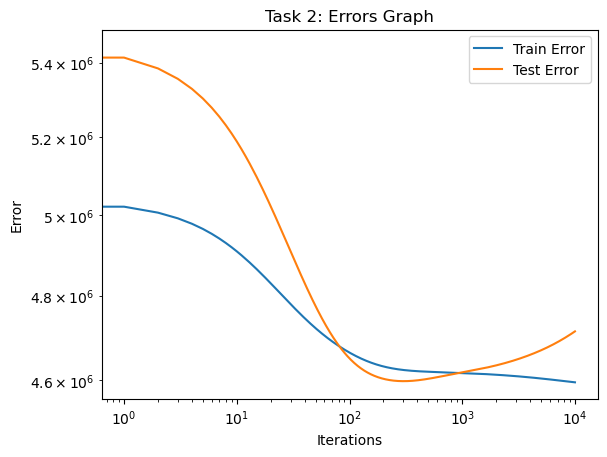

In [161]:
train_x = np.stack(errors_train)
test_x = np.stack(errors_test)
relative_error = np.abs(errors_train[-1]-errors_test[-1])/errors_train[-1]
print(str(100*relative_error)+"%")
plt.plot(train_x, label='Train Error')
plt.plot(test_x, label='Test Error')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.title("Task 2: Errors Graph")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()